In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import glob

In [2]:
files = glob.glob(r'C:\Users\Antino\Desktop\al_ml_tranning_module_one\Uzma_code\Invoices\*')

In [3]:
data = pd.concat((pd.read_csv(files) for files in files),ignore_index = True)

In [4]:
data.shape

(693360, 28)

In [5]:
data.columns

Index(['Invoice ID', 'Invoice Status', 'Customer ID', 'Due Date',
       'PurchaseOrder', 'SubTotal', 'Total', 'Balance', 'Adjustment',
       'Expected Payment Date', 'Last Payment Date', 'Item Name', 'Item Desc',
       'Quantity', 'Discount', 'Discount Amount', 'Item Total', 'Item Price',
       'Product ID', 'SKU', 'Customer Name', 'Invoice Date', 'Invoice Number',
       'Account', 'Account Code', 'Sales person', 'Item Type', 'Usage Unit'],
      dtype='object')

In [6]:
drop_cols = ['Balance', 'Adjustment', 'Expected Payment Date','Item Desc','Discount',
                   'Discount Amount','Account Code','Sales person','PurchaseOrder','SubTotal']
df = data.drop(drop_cols,axis = 1)

In [7]:
df.shape

(693360, 18)

In [8]:
df.columns

Index(['Invoice ID', 'Invoice Status', 'Customer ID', 'Due Date', 'Total',
       'Last Payment Date', 'Item Name', 'Quantity', 'Item Total',
       'Item Price', 'Product ID', 'SKU', 'Customer Name', 'Invoice Date',
       'Invoice Number', 'Account', 'Item Type', 'Usage Unit'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693360 entries, 0 to 693359
Data columns (total 18 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Invoice ID         693360 non-null  int64  
 1   Invoice Status     693360 non-null  object 
 2   Customer ID        693360 non-null  int64  
 3   Due Date           693360 non-null  object 
 4   Total              693360 non-null  float64
 5   Last Payment Date  572071 non-null  object 
 6   Item Name          693343 non-null  object 
 7   Quantity           693360 non-null  float64
 8   Item Total         693360 non-null  float64
 9   Item Price         693360 non-null  float64
 10  Product ID         693343 non-null  float64
 11  SKU                693343 non-null  object 
 12  Customer Name      693360 non-null  object 
 13  Invoice Date       693360 non-null  object 
 14  Invoice Number     693360 non-null  object 
 15  Account            693360 non-null  object 
 16  It

In [10]:
df.head()

,Invoice ID,Invoice Status,Customer ID,Due Date,Total,Last Payment Date,Item Name,Quantity,Item Total,Item Price,Product ID,SKU,Customer Name,Invoice Date,Invoice Number,Account,Item Type,Usage Unit
0,209792000458527712,Closed,209792000285655627,2023-01-01,12394.5,2023-01-27,"Tomato Hybrid (Mix of medium, semi ripe 12-16 ...",100.0,1400.0,14.0,2.097920e+17,FARMTHFINALCAT107,KINEMATIC FOODTECH PRIVATE LIMITED,2023-01-01,INV-082845,Sales,goods,1 Kg
1,209792000458527712,Closed,209792000285655627,2023-01-01,12394.5,2023-01-27,"Potato - (Medium, 17-20 pcs/kg)",50.0,1350.0,27.0,2.097920e+17,FARMTHFINALCAT94,KINEMATIC FOODTECH PRIVATE LIMITED,2023-01-01,INV-082845,Sales,goods,1 Kg
2,209792000458527712,Closed,209792000285655627,2023-01-01,12394.5,2023-01-27,Onion - Medium,100.0,2500.0,25.0,2.097920e+17,FARMTHFINALCAT82,KINEMATIC FOODTECH PRIVATE LIMITED,2023-01-01,INV-082845,Sales,goods,1 Kg
3,209792000458527712,Closed,209792000285655627,2023-01-01,12394.5,2023-01-27,"Cucumber Indian (Big, misshapes)",50.0,600.0,12.0,2.097920e+17,FARMTHFINALCAT54,KINEMATIC FOODTECH PRIVATE LIMITED,2023-01-01,INV-082845,Sales,goods,1 Kg
4,209792000458527712,Closed,209792000285655627,2023-01-01,12394.5,2023-01-27,curry leaves,2.0,150.0,75.0,2.097920e+17,FARMTHFINALCAT57,KINEMATIC FOODTECH PRIVATE LIMITED,2023-01-01,INV-082845,Sales,goods,Kg


In [11]:
df.tail()

,Invoice ID,Invoice Status,Customer ID,Due Date,Total,Last Payment Date,Item Name,Quantity,Item Total,Item Price,Product ID,SKU,Customer Name,Invoice Date,Invoice Number,Account,Item Type,Usage Unit
693355,209792000798664883,Open,209792000044923524,2023-06-30,549.0,NaN,Mango Ripe,1.0,80.0,80.0,2.097920e+17,FARMTHFINALCAT33238,RED APPLE KITCHEN CONSULTANCY PVT LTD (COLLAGE...,2023-06-04,INV-121927,Sales,goods,1 Kg
693356,209792000798664883,Open,209792000044923524,2023-06-30,549.0,NaN,Lettuce Iceberg,0.6,54.0,90.0,2.097920e+17,FARMTHFINALCAT74,RED APPLE KITCHEN CONSULTANCY PVT LTD (COLLAGE...,2023-06-04,INV-121927,Sales,goods,1 Kg
693357,209792000798664883,Open,209792000044923524,2023-06-30,549.0,NaN,Lettuce Green,0.5,82.5,165.0,2.097920e+17,FARMTHFINALCAT73,RED APPLE KITCHEN CONSULTANCY PVT LTD (COLLAGE...,2023-06-04,INV-121927,Sales,goods,1 Kg
693358,209792000798664883,Open,209792000044923524,2023-06-30,549.0,NaN,Lettuce Romaine,0.5,65.0,130.0,2.097920e+17,FARMTHFINALCAT76,RED APPLE KITCHEN CONSULTANCY PVT LTD (COLLAGE...,2023-06-04,INV-121927,Sales,goods,1 Kg
693359,209792000798664883,Open,209792000044923524,2023-06-30,549.0,NaN,Rocket Lettuce - Arugula,0.5,52.5,105.0,2.097920e+17,FARMTHFINALCAT99370,RED APPLE KITCHEN CONSULTANCY PVT LTD (COLLAGE...,2023-06-04,INV-121927,Sales,goods,1 Kg


In [12]:
df.describe()

,Invoice ID,Customer ID,Total,Quantity,Item Total,Item Price,Product ID
count,6.933600e+05,6.933600e+05,693360.000000,693360.000000,693360.000000,693360.000000,6.933430e+05
mean,2.097920e+17,2.097920e+17,3173.905582,3.555078,146.518705,64.921056,2.097920e+17
std,1.038913e+08,1.909196e+08,3768.869519,11.567285,341.040419,49.103444,1.006360e+07
min,2.097920e+17,2.097920e+17,0.500000,0.050000,0.000000,0.000000,2.097920e+17
25%,2.097920e+17,2.097920e+17,1565.500000,0.500000,38.000000,32.000000,2.097920e+17
50%,2.097920e+17,2.097920e+17,2437.500000,1.000000,75.000000,55.000000,2.097920e+17
75%,2.097920e+17,2.097920e+17,3583.150000,3.000000,150.000000,85.000000,2.097920e+17
max,2.097920e+17,2.097920e+17,86193.500000,3000.000000,21263.000000,1500.000000,2.097920e+17


### Handle missing values
**missing value**
- Last Payment Date    121289 Replace with NaN
- Product ID               17 Replace with miscellaneous
- SKU                      17 Replace with miscellaneous
- Usage Unit               17 Replace with its mode

- They are same rows have null value in  **Product_id, SKU, Usage Unit** .So its better to replace them all, because if drop them its affect on revenue .


In [13]:
#Find null values

df.isnull().sum()

Invoice ID                0
Invoice Status            0
Customer ID               0
Due Date                  0
Total                     0
Last Payment Date    121289
Item Name                17
Quantity                  0
Item Total                0
Item Price                0
Product ID               17
SKU                      17
Customer Name             0
Invoice Date              0
Invoice Number            0
Account                   0
Item Type                 0
Usage Unit               17
dtype: int64

In [15]:
#checking null values in data

df[df['Item Name'].isnull()]


,Invoice ID,Invoice Status,Customer ID,Due Date,Total,Last Payment Date,Item Name,Quantity,Item Total,Item Price,Product ID,SKU,Customer Name,Invoice Date,Invoice Number,Account,Item Type,Usage Unit
603,209792000458535785,Closed,209792000458535763,2023-01-01,10239.25,2023-01-12,NaN,10.0,370.0,37.0,NaN,NaN,MAAN RESTAURANT PVT LTD(NASI AND MEE YELAHANKA),2023-01-01,INV-082869,Sales,service,NaN
60280,209792000486003235,Closed,209792000482016007,2023-01-16,2686.95,2023-01-30,NaN,0.7,49.0,70.0,NaN,NaN,BRASSA,2023-01-16,INV-086253,Sales,service,NaN
74623,209792000497208001,Closed,209792000458535007,2023-01-19,4800.00,2023-02-10,NaN,1.0,1000.0,1000.0,NaN,NaN,NOYO LABS TECHNOLOGY PVT LTD,2023-01-19,INV-087115,Sales,service,NaN
169005,209792000555311060,Closed,209792000536030887,2023-02-10,1210.50,2023-04-18,NaN,1.0,310.0,310.0,NaN,NaN,F SUPER CLUB(HARLUR ROAD),2023-02-10,INV-092617,Sales,service,NaN
169023,209792000555311096,Closed,209792000043647835,2023-02-28,1956.75,2023-02-20,NaN,1.0,550.0,550.0,NaN,NaN,RED APPLE KITCHEN CONSULTANCY PVT LTD (TOSCANO...,2023-02-10,INV-092618,Sales,service,NaN
188426,209792000557666339,Closed,209792000000090706,2023-02-28,4264.90,2023-02-28,NaN,1.0,1037.0,1037.0,NaN,NaN,TAKE A BREAK,2023-02-14,INV-093605,Sales,service,NaN
419448,209792000708700324,Closed,209792000043647835,2023-04-30,3851.20,2023-04-17,NaN,1.0,980.0,980.0,NaN,NaN,RED APPLE KITCHEN CONSULTANCY PVT LTD (TOSCANO...,2023-04-07,INV-106616,Sales,service,NaN
502797,209792000737120303,Closed,209792000643727099,2023-04-25,910.70,2023-05-10,NaN,1.0,350.0,350.0,NaN,NaN,INA ELITE HOSPITALITY PVT LTD (HSR LAYOUT),2023-04-25,INV-111269,Sales,service,NaN
578811,209792000759435753,Overdue,209792000219329033,2023-05-12,4083.00,NaN,NaN,3.0,93.0,31.0,NaN,NaN,TOUCH STONE FOUNDATION PRODUCTION (GENERAL),2023-05-12,INV-115436,Sales,service,NaN
580962,209792000760660091,Overdue,209792000760660061,2023-05-12,18271.00,NaN,NaN,3.0,210.0,70.0,NaN,NaN,PAAKASHALA (YELACHENAHALLI),2023-05-12,INV-115569,Sales,service,NaN


In [25]:
#filling null values

df['Usage Unit'].fillna(df['Usage Unit'].mode().values[0],inplace=True)
df['Item Name'].fillna(df['Item Name'].sample(n=1).values[0],inplace=True)
df['SKU'].fillna('miscellaneous',inplace=True)
df['Product ID'].fillna('miscellaneous',inplace=True)
df['Last Payment Date'].fillna('NaN',inplace=True)

In [26]:
#recheck null values in data

df.isnull().sum()

Invoice ID           0
Invoice Status       0
Customer ID          0
Due Date             0
Total                0
Last Payment Date    0
Item Name            0
Quantity             0
Item Total           0
Item Price           0
Product ID           0
SKU                  0
Customer Name        0
Invoice Date         0
Invoice Number       0
Account              0
Item Type            0
Usage Unit           0
dtype: int64

## Data cleaning
 **Duplicate value**
- There are 78 duplicated value, They are just repeated items, because there ***Item Total is equal to there Total amount*** 

In [79]:
#seeing duplicated values
    
df[df.duplicated()]

,Invoice ID,Invoice Status,Customer ID,Due Date,Total,Last Payment Date,Item Name,Quantity,Item Total,Item Price,Product ID,SKU,Customer Name,Invoice Date,Invoice Number,Account,Item Type,Usage Unit,Invoice Month
33557,209792000472498537,Closed,209792000060153076,2023-01-09,1823.40,2023-01-18,Zucchini Green - Medium,1.0,70.0,70.0,209792000054203744.0,FARMTHFINALCAT111,RED APPLE KITCHEN CONSULTANCY PVT LTD (TOSCANO...,2023-01-09,INV-084737,Sales,goods,1 Kg,January
76601,209792000497384551,Closed,209792000043647835,2023-01-20,4045.30,2023-02-03,Capsicum Red - Big,3.0,360.0,120.0,209792000054204096.0,FARMTHFINALCAT34,RED APPLE KITCHEN CONSULTANCY PVT LTD (TOSCANO...,2023-01-20,INV-087203,Sales,goods,1 Kg,January
76664,209792000497384683,Closed,209792000051286209,2023-01-20,3533.30,2023-02-17,Capsicum Yellow - Big,0.5,60.0,120.0,209792000054204128.0,FARMTHFINALCAT36,BLUE PLANET FOOD'S PVT LTD (SALT),2023-01-20,INV-087205,Sales,goods,1 Kg,January
90429,209792000504050101,Closed,209792000083353218,2023-01-23,1424.00,2023-03-17,Zucchini Green - Medium,1.0,77.0,77.0,209792000054203744.0,FARMTHFINALCAT111,"EAT OZ ( MOMOS CHINESE DELICACY,BELLANDUR)",2023-01-23,INV-087989,Sales,goods,1 Kg,January
90781,209792000504051057,Overdue,209792000086198045,2023-01-23,1625.50,NaN,Capsicum Green - Big,3.0,147.0,49.0,209792000054203488.0,FARMTHFINALCAT32,EAT OZ (WHITEFIELD),2023-01-23,INV-088009,Sales,goods,1 Kg,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
665261,209792000787924639,Overdue,209792000052039257,2023-05-30,1153.50,NaN,Apple,0.5,112.5,225.0,209792000054203456.0,FARMTHFINALCAT4,LE ROCK,2023-05-30,INV-120404,Sales,goods,1 Kg,May
675571,209792000792780615,Overdue,209792000047987742,2023-06-01,3414.25,2023-06-02,Carrot Local - Medium,1.0,39.0,39.0,209792000054203872.0,FARMTHFINALCAT39,NAPOLI ITALIAN BISTRO (HSR),2023-06-01,INV-120991,Sales,goods,1 Kg,June
679079,209792000795009099,Overdue,209792000399970345,2023-06-02,3008.40,NaN,Potato,5.0,140.0,28.0,209792000054203808.0,FARMTHFINALCAT93,RED APPLE KITCHEN CONSULTANCY PVT LTD (THANISA...,2023-06-02,INV-121161,Sales,goods,1 Kg,June
679858,209792000795011041,Overdue,209792000060867186,2023-06-02,5627.65,NaN,Leeks,0.5,52.5,105.0,209792000054203936.0,FARMTHFINALCAT69,FLOAT FOOD AND BEVERAGES,2023-06-02,INV-121204,Sales,goods,1 Kg,June


In [81]:
#matching there Item Total = Total of that invoice

df[df['Invoice ID'] == 209792000472498537].sum()

Invoice ID                                         3356672007559976592
Invoice Status       ClosedClosedClosedClosedClosedClosedClosedClos...
Customer ID                                        3356672000962449216
Due Date             2023-01-092023-01-092023-01-092023-01-092023-0...
Total                                                          29174.4
Last Payment Date    2023-01-182023-01-182023-01-182023-01-182023-0...
Item Name            PalakBroccoli  - BigZucchini Green - MediumZuc...
Quantity                                                          42.9
Item Total                                                      1823.4
Item Price                                                      1068.0
Product ID                                       3356672000867262464.0
SKU                  FARMTHFINALCAT4832FARMTHFINALCAT27FARMTHFINALC...
Customer Name        RED APPLE KITCHEN CONSULTANCY PVT LTD (TOSCANO...
Invoice Date         2023-01-092023-01-092023-01-092023-01-092023-0...
Invoic

## Explore variables

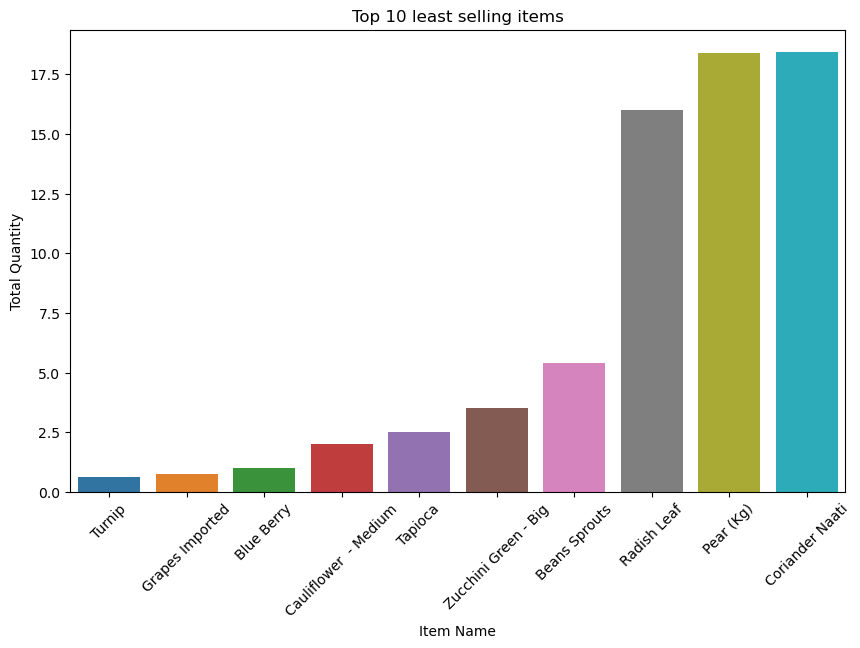

In [92]:
#Top 10 Item which have lowest quantity sell in KG

Lowest_Quantity = df.groupby('Item Name')['Quantity'].sum().sort_values().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=Lowest_Quantity.index, y=Lowest_Quantity.values)
plt.xlabel('Item Name')
plt.ylabel('Total Quantity')
plt.title('Top 10 least selling items')
plt.xticks(rotation=45)  # Rotate x-axis labels if they are long
plt.show()

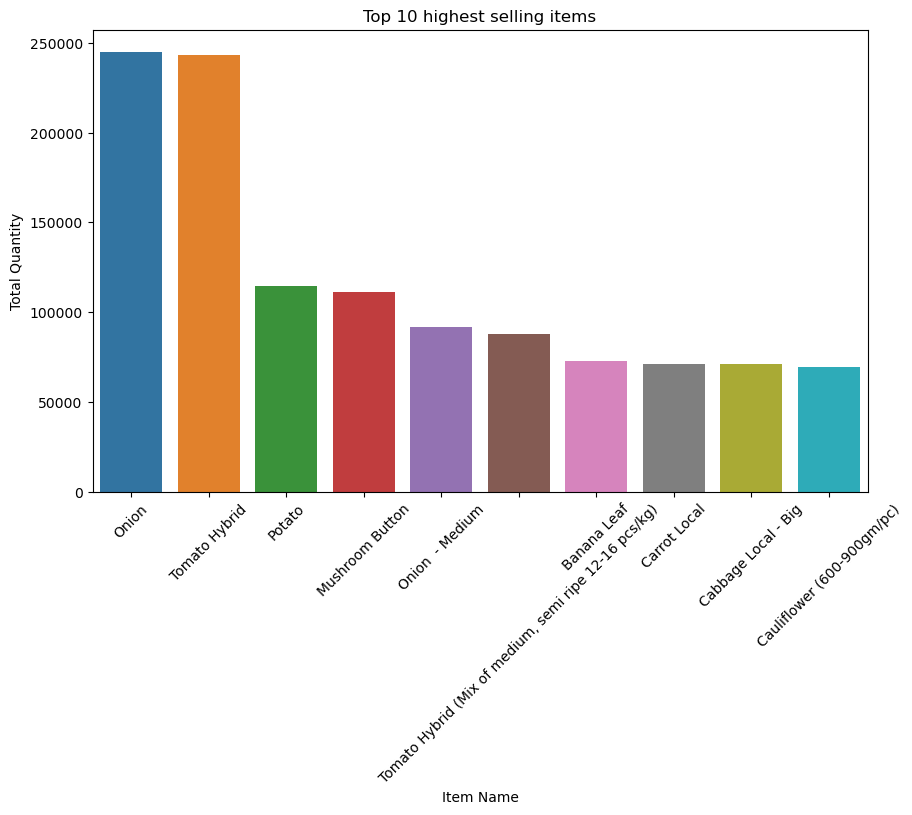

In [94]:
#Top 10 Item which have highest quantity sell in KG

Lowest_Quantity = df.groupby('Item Name')['Quantity'].sum().sort_values(ascending = False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=Lowest_Quantity.index, y=Lowest_Quantity.values)
plt.xlabel('Item Name')
plt.ylabel('Total Quantity')
plt.title('Top 10 highest selling items')
plt.xticks(rotation=45)  # Rotate x-axis labels if they are long
plt.show()

In [80]:
#Adding invoice month column

df['Invoice Month'] = pd.to_datetime(df['Invoice Date']).dt.month_name()

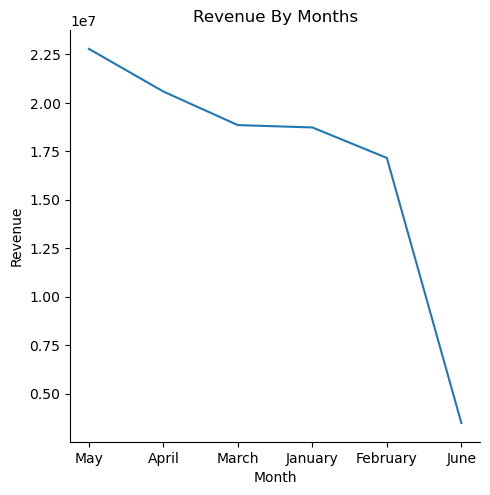

In [107]:
#Revenue by months

revenue_month = df.groupby('Invoice Month')['Item Total'].sum().sort_values(ascending=False)
sns.relplot(data=revenue_month, x=revenue_month.index, y=revenue_month.values, kind='line')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.title('Revenue By Months')
plt.show()

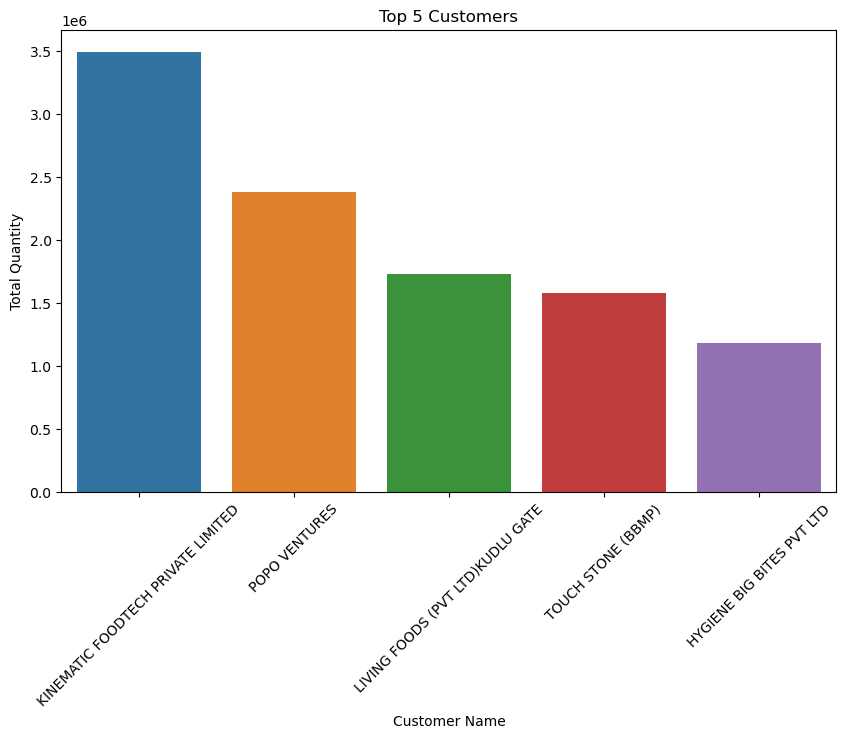

In [126]:
#Top 5 customers 

Item_Total = df.groupby('Customer Name')['Item Total'].sum().sort_values(ascending= False).head(5)
plt.figure(figsize=(10, 6))
sns.barplot(x=Item_Total.index, y=Item_Total.values)
plt.xlabel('Customer Name')
plt.ylabel('Total Quantity')
plt.title('Top 5 Customers')
plt.xticks(rotation=45)  # Rotate x-axis labels if they are long
plt.show()

,Invoice ID,Customer ID,Total,Quantity,Item Total,Item Price
Invoice ID,1.000000,0.121023,0.029882,-0.005948,0.010978,0.099144
Customer ID,0.121023,1.000000,-0.013370,0.027714,0.027277,0.001746
Total,0.029882,-0.013370,1.000000,0.323357,0.422243,0.027872
Quantity,-0.005948,0.027714,0.323357,1.000000,0.748320,-0.148383
Item Total,0.010978,0.027277,0.422243,0.748320,1.000000,0.039756
Item Price,0.099144,0.001746,0.027872,-0.148383,0.039756,1.000000


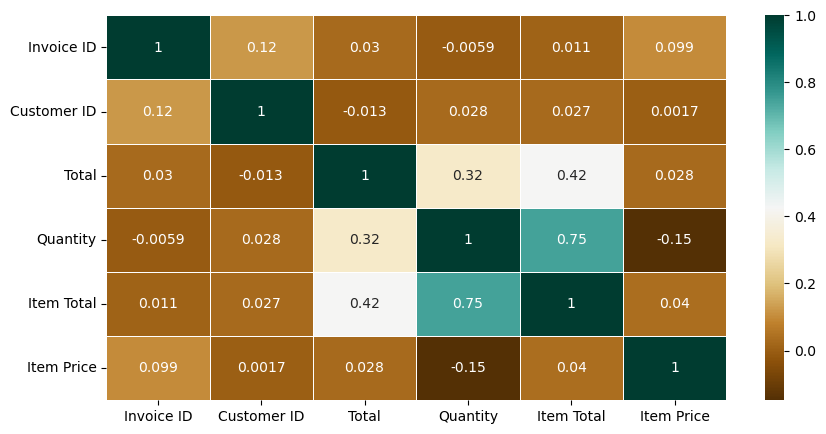

In [54]:
plt.figure(figsize=(10,5))
c= df.corr(numeric_only=True)
sns.heatmap(c,cmap="BrBG",annot=True, linewidths=0.7)
c


### Total Number of Customers in 2022 

In [116]:
#Total Number of Customers in 2022

df['Customer ID'].nunique()

567

### Total Number of Invoices in 2022

In [117]:
#Total Number of Invoices in 2022

df['Invoice Number'].nunique()

38207

### Total Number of Unique SKU's sold in 2022

In [118]:
#Total Number of Unique SKU's sold in 2022

df['SKU'].nunique()

160

### Total Revenue Generated in 2022

In [119]:
#Total Revenue Generated in 2022

df['Item Total'].sum()

101590209.60999995

### Total Quantity Sold in 2022

In [121]:
#Total Quantity Sold in 2022

df['Quantity'].sum()

2464948.7350000003

### Total Produce SKU in 2022 per SKU:
- Quantity
- Revenue

In [122]:
#Total Produce SKU in 2022 per SKU:

sku = df.groupby('SKU')[['Quantity','Item Total']].sum()
sku

,Quantity,Item Total
SKU,,
FARMTHEORYFINALCAT00234100,157.60,5818.00
FARMTHEORYFINALCAT00234101,55.00,1389.00
FARMTHEORYFINALCAT0023490,262.70,17596.00
FARMTHEORYFINALCAT0023491,28.80,1421.70
FARMTHEORYFINALCAT012395,1458.40,112365.80
...,...,...
FARMTHFINALCAT97,15477.75,402048.30
FARMTHFINALCAT98,2154.61,237517.34
FARMTHFINALCAT99,6215.00,240374.15


### Performing correlation (pearsonr) test between Quantity & Total Item

In [125]:
# Performing correlation test to check the relation between Quantity & Total Item

Quantity = df['Quantity']
item_total = df['Item Total']
corr = stats.pearsonr(Quantity, item_total)
print("Correlation Test between 'Quantity' and 'Item Total'")
print(f"Pearson's correlation coefficient: {corr}")

Correlation Test between 'Quantity' and 'Item Total'
Pearson's correlation coefficient: PearsonRResult(statistic=0.7483195921342425, pvalue=0.0)
